In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df['X'] = df['3.159499363321345566e-02']
df['Y'] = df['9.869877579082642072e-01']
df['Class'] = df['0.000000000000000000e+00']

In [5]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00,X,Y,Class
0,2.115098,-0.046244,1.0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0,2.112857,0.662084,1.0


In [6]:
df.drop(columns=['3.159499363321345566e-02','9.869877579082642072e-01','0.000000000000000000e+00'],inplace=True)

In [7]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [8]:
df['Class'].value_counts()

Class
1.0    50
0.0    49
Name: count, dtype: int64

In [9]:
new_row = pd.DataFrame({'X':[0.031594],'Y':[0.986987],'Class':[0.0]})

In [10]:
df = pd.concat([df,new_row], ignore_index=True)

In [11]:
df.shape

(100, 3)

In [12]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


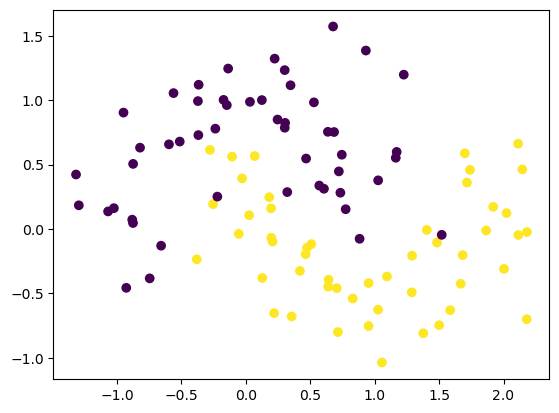

In [13]:
plt.scatter(df['X'],df['Y'],c=df['Class'])
plt.show()

In [14]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()

model.add(Dense(10, activation='tanh',input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.get_weights()

[array([[ 0.513138  , -0.31897914, -0.4533352 , -0.62507415, -0.08472323,
         -0.19107139, -0.62498194,  0.07444853, -0.03388387,  0.30845135],
        [ 0.4351917 ,  0.43354064,  0.3179757 , -0.6854274 , -0.46113944,
          0.61924475,  0.24203521, -0.02835977, -0.32071728, -0.00311178]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.14209348],
        [-0.18290442],
        [ 0.49443752],
        [-0.3477197 ],
        [-0.08022606],
        [ 0.17864245],
        [-0.20433748],
        [ 0.21070522],
        [ 0.54423445],
        [-0.26773134]], dtype=float32),
 array([0.], dtype=float32)]

In [34]:
initial_weights = model.get_weights()

In [35]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [36]:
model.set_weights(initial_weights)

In [37]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
history = model.fit(x,y,epochs=100,validation_split=0.2,verbose=True)

Epoch 1/100
3/3 [==============================] - 0s 79ms/step - loss: 1.9157 - accuracy: 0.5000 - val_loss: 1.4421 - val_accuracy: 0.5500
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 1.9002 - accuracy: 0.5000 - val_loss: 1.4283 - val_accuracy: 0.5500
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 1.8850 - accuracy: 0.5000 - val_loss: 1.4146 - val_accuracy: 0.5500
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 1.8692 - accuracy: 0.5000 - val_loss: 1.4009 - val_accuracy: 0.5500
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 1.8545 - accuracy: 0.5000 - val_loss: 1.3872 - val_accuracy: 0.5500
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 1.8394 - accuracy: 0.5000 - val_loss: 1.3737 - val_accuracy: 0.5500
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 1.8237 - accuracy: 0.5000 - val_loss: 1.3604 - val_accuracy: 0.5500
Epoch 8/100
3/3 [===

In [40]:
model.get_weights()

[array([[0.53772455, 0.53772455, 0.53772455, 0.53772455, 0.53772455,
         0.53772455, 0.53772455, 0.53772455, 0.53772455, 0.53772455],
        [0.2229094 , 0.2229094 , 0.2229094 , 0.2229094 , 0.2229094 ,
         0.2229094 , 0.2229094 , 0.2229094 , 0.2229094 , 0.2229094 ]],
       dtype=float32),
 array([0.24934983, 0.24934983, 0.24934983, 0.24934983, 0.24934983,
        0.24934983, 0.24934983, 0.24934983, 0.24934983, 0.24934983],
       dtype=float32),
 array([[0.2502146],
        [0.2502146],
        [0.2502146],
        [0.2502146],
        [0.2502146],
        [0.2502146],
        [0.2502146],
        [0.2502146],
        [0.2502146],
        [0.2502146]], dtype=float32),
 array([0.23011874], dtype=float32)]

9600/9600 [==============================] - 7s 738us/step


<Axes: >

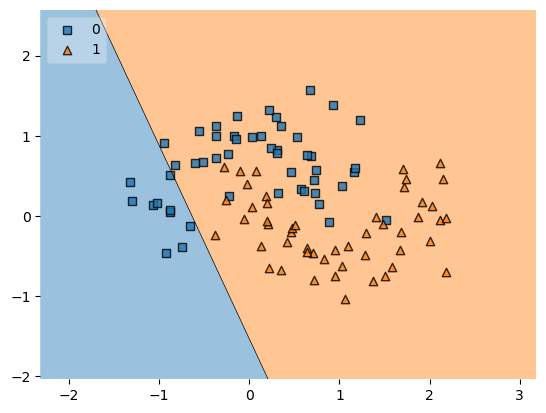

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)